# 시계열 예측
## 시계열 자료
### 의미
* 시간의 흐름에 따라 순서대로 관측되는 자료
* 구성: 추세변동, 순환변동, 계절변동, 불규칙 변동
* 정보의 특성: 이산, 연속
* 실제 연속적 형태의 시계열도 관측에 시차가 존재해 이산적 모습을 보이는 경우가 많다.
* lag: 관측 시점간의 시각 차이

### 분석 목적
* 시계열 자료 패턴의 유지 가정의 미래 예측

### 시계열 형태
* 불규칙변동(irregular variation), 확률적 변동(random variation)
    - 시계열 자료의 시간에 따른 규칙적 움직임과 달리 규칙성 없이 예측이 불가능하게 발생하는 우연적 변동
    
* 체계적 변동
    - 추세변동
        장기간에 걸친 추세로 나타나는 변동
    - 순환변동
        추세선을 따라 주기적 오르내림을 반복하는 변동
    - 계절변동
        1년 주기로 계절적 요인이 작용하는 변동

## 추세 변동(variation)
### 의미
* 

In [1]:
import numpy as np
import pandas as pd

# DatetimeIndex
dates = pd.date_range('2020-01-01',periods=48,freq='m')

# additive model: trend + cycle + seasonality + irregular time
timestamp = np.arange(len(dates))
trend_factor = timestamp*1.1
cycle_factor = 10*np.sin(np.linspace(0,3.14*8,48))
seasonal_factor = 7 * np.sin(np.linspace(0,3.14*8,48))
np.random.seed(2004)
irregular_factor = 2*np.random.randn(len(dates))

df = pd.DataFrame({'timeseries':trend_factor+cycle_factor+seasonal_factor+irregular_factor,
                 'trend':trend_factor,
                 'cycle':cycle_factor,
                 'seasonal':seasonal_factor,
                 'irregular':irregular_factor},
                 index=dates)
df

,timeseries,trend,cycle,seasonal,irregular
2020-01-31,2.596119,0.0,0.000000,0.000000,2.596119
2020-02-29,10.507796,1.1,5.093834,3.565684,0.748278
2020-03-31,14.238346,2.2,8.766892,6.136825,-2.865371
2020-04-30,14.348605,3.3,9.994684,6.996279,-5.942358
2020-05-31,20.230574,4.4,8.434753,5.904327,1.491495
2020-06-30,14.509712,5.5,4.522195,3.165536,1.321981
2020-07-31,6.290981,6.6,-0.651696,-0.456187,0.798865
2020-08-31,-1.748388,7.7,-5.643816,-3.950671,0.146099
2020-09-30,-8.100557,8.8,-9.061759,-6.343231,-1.495567
2020-10-31,-6.798314,9.9,-9.952191,-6.966533,0.220411


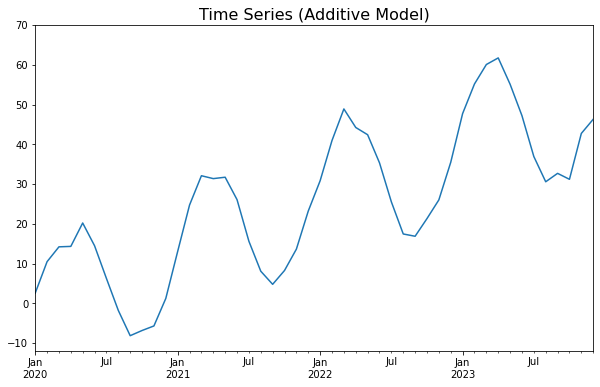

In [2]:
# 시계열동
import matplotlib.pyplot as plt
plt.figure(figsize=[10,6])
df.timeseries.plot()
plt.title('Time Series (Additive Model)',fontsize=16)
plt.ylim(-12,70)
plt.show()

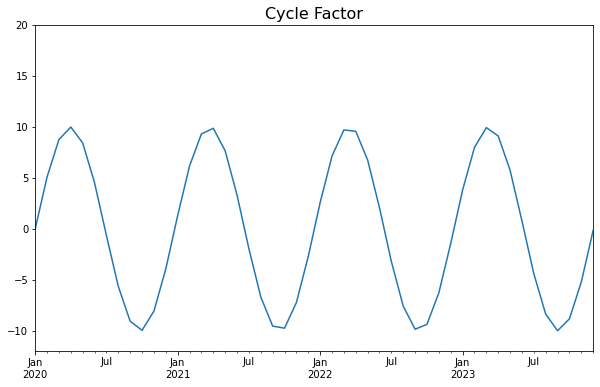

In [3]:
#순환변동
import matplotlib.pyplot as plt
plt.figure(figsize=[10,6])
df.cycle.plot()
plt.title('Cycle Factor',fontsize=16)
plt.ylim(-12,20)
plt.show()

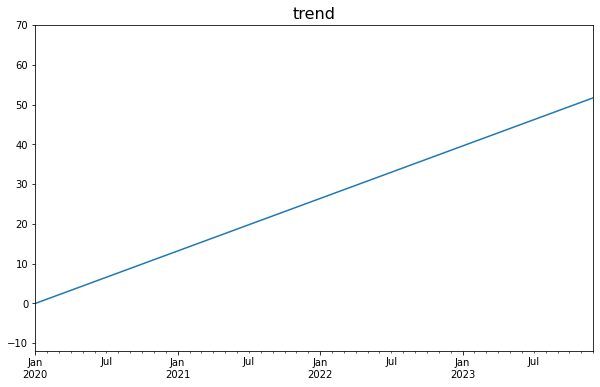

In [4]:
# 추세변동
import matplotlib.pyplot as plt
plt.figure(figsize=[10,6])
df.trend.plot()
plt.title('trend',fontsize=16)
plt.ylim(-12,70)
plt.show()

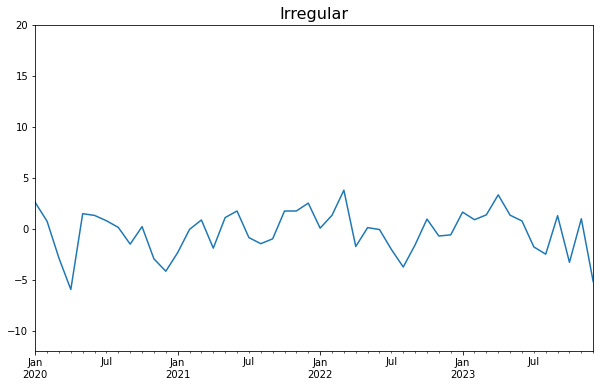

In [5]:
# 불규칙 변동
import matplotlib.pyplot as plt
plt.figure(figsize=[10,6])
df.irregular.plot()
plt.title('Irregular',fontsize=16)
plt.ylim(-12,20)
plt.show()

## 평활화 기법
### 의미
* 시계열의 복잡한 추세(trend)를 명확하게 해주는 방법이다.
### 방법
#### 단순이동평활법(SMA)
* 시계열 평활화를 위해서 이동평균을 사용하는 방법
* 과거 자료의 적정 개수를 이용해 계산한다.
* pandas의 rolling() method를 활용한다.
#### 지수 평활법(EMA)
* 새로운 데이터에 더 많은 가중치를 부여하는 방법
* pandas의 ewm() method를 활용한다.

In [6]:
#단순이동 평활법
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

#2020.8부터 일요일 8개 조회
pd.date_range(start='2020-08',periods=8,freq='W')

df = pd.DataFrame({
    'week':pd.date_range(start='2020-08',periods=8,freq='W'),
    'sales':[39,44,40,45,38,43,39,np.nan],
    '3MA':[0]*8
})
df['3MA'] = df[['sales']].rolling(3).mean().shift(1)
df

,week,sales,3MA
0,2020-08-02,39.0,NaN
1,2020-08-09,44.0,NaN
2,2020-08-16,40.0,NaN
3,2020-08-23,45.0,41.0
4,2020-08-30,38.0,43.0
5,2020-09-06,43.0,41.0
6,2020-09-13,39.0,42.0
7,2020-09-20,NaN,40.0


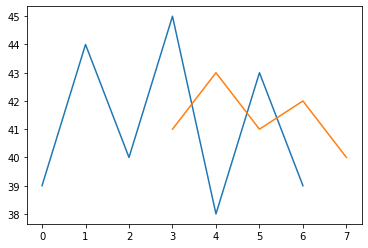

In [7]:
df.sales.plot()
df['3MA'].plot()
plt.show()

Text(0.5, 1.0, 'Close Price for Apple')

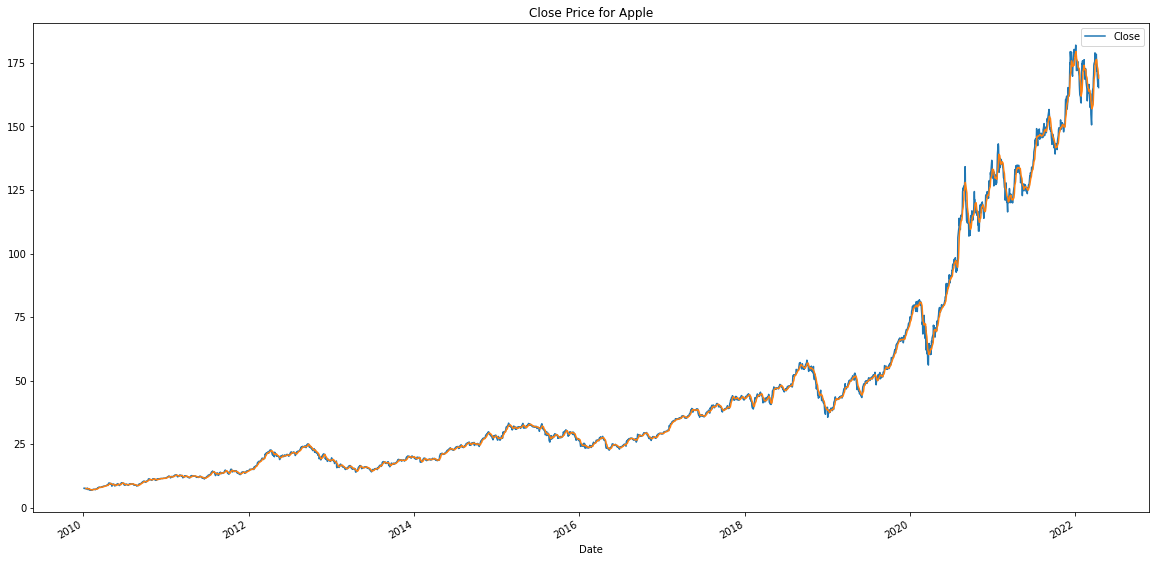

In [8]:
import FinanceDataReader as fdr

df_apple = fdr.DataReader('AAPL',start='2010')
df_apple.tail(10)

df_apple[['Close']].plot(figsize=(20,10))
df_apple['Close_7Days_mean'] = df_apple['Close'].rolling(7).mean()
df_apple['Close_7Days_mean'].plot()
plt.title('Close Price for Apple')

Text(0.5, 1.0, 'Monthlly Mean Close Price for Apple')

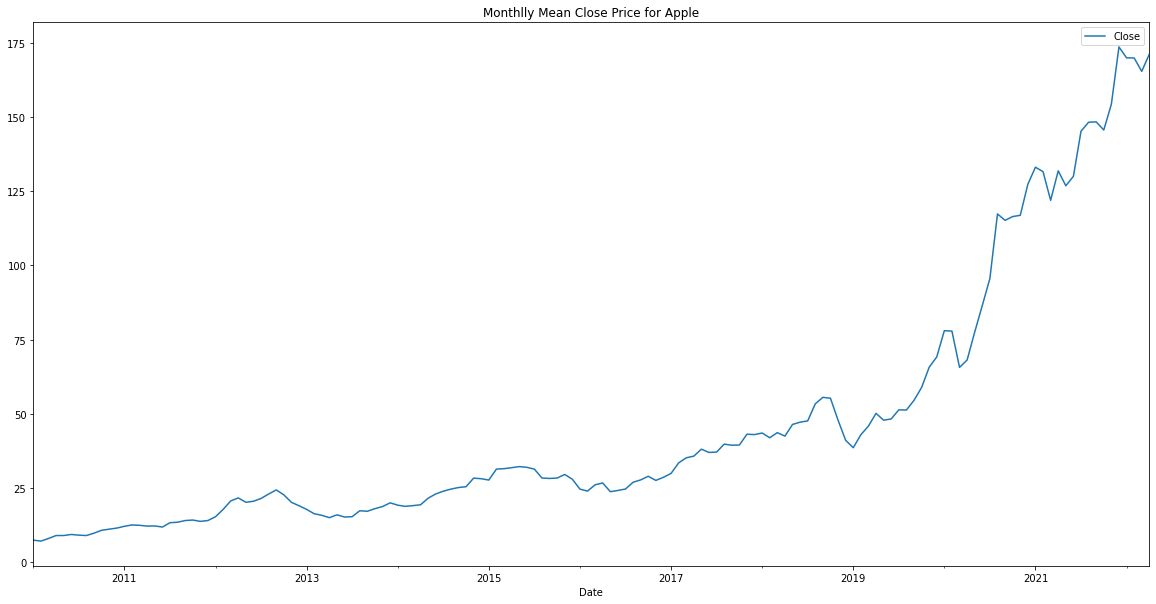

In [9]:
df_apple_monthly = df_apple.resample(rule='M').mean()
df_apple_montly = df_apple_monthly.iloc[:,:-1]
df_apple_monthly
df_apple_monthly[['Close']].plot(figsize=(20,10))
plt.title('Monthlly Mean Close Price for Apple')

<AxesSubplot:xlabel='Date'>

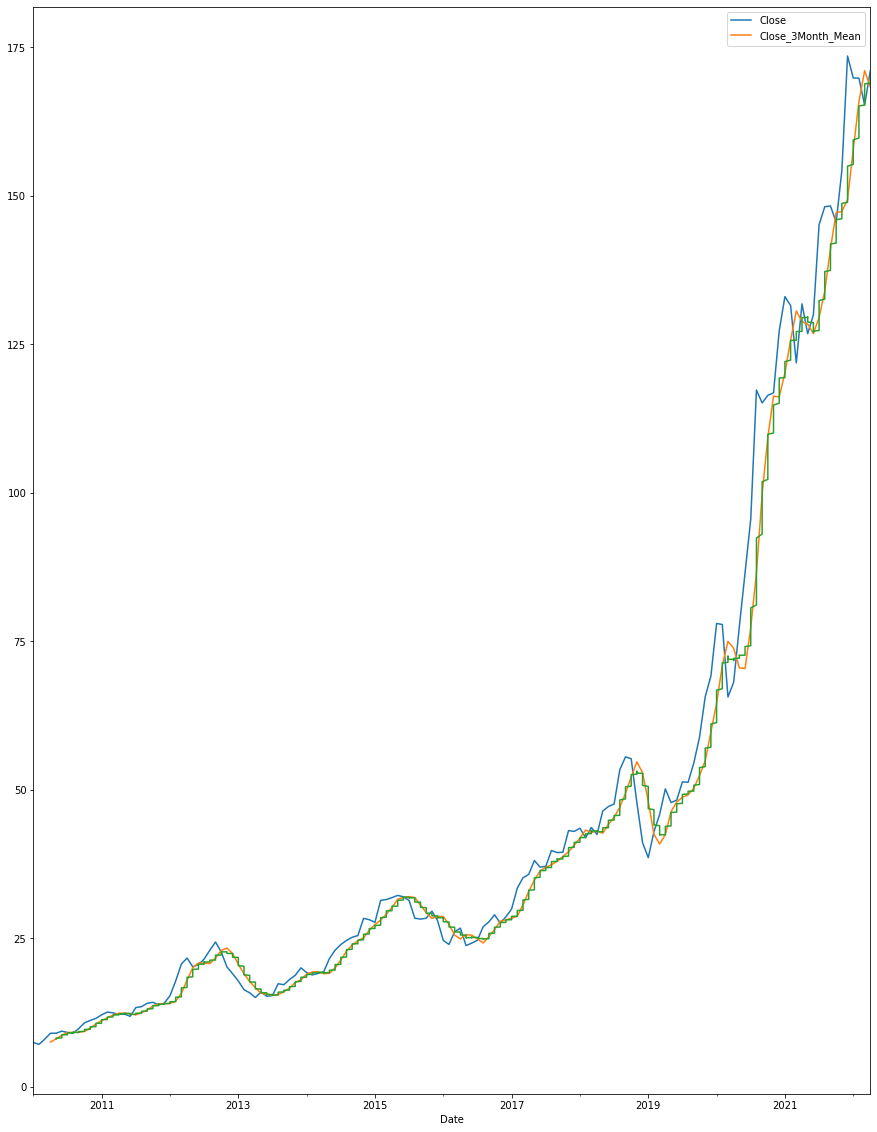

In [10]:
df_apple_monthly[['Close_3Month_Mean']]=df_apple_monthly[['Close']].rolling(3).mean().shift(1)
df_apple['3month'] = df_apple[['Close']].rolling(90).mean().shift(1)
# 구체적인 수치로 shift를 하는 이유를 설명하자.
# 3시점의 가격에 대한 예측은 그 이전의 평균 값의 평균이고
# 3시점의 결과값과 비교를 해야한다. 
# 그렇기에 shift를 하지 않는다면 1~2시점의 평균은 2시점 결과값
# 옆에 존재하기 때문에 shift를 통해 3시점의 옆에 예측값을 둔다.

df_apple_monthly[['Close','Close_3Month_Mean']].plot(figsize=(15,20))
df_apple['3month'].plot(figsize=(15,20))

#굳이 1개우러 단위 샘플링을 한 이후에 3개월 단위로 다시 rolling을 진행하는가?
# -> 한달이 모두 30일인 것은 아니듯이 3개월 단위마다 해당 날짜 수는 달라진다.
# 그렇기에월마다 날짜 차이를 생각해서 rolling을 진행하기 보다는 1개월 단위로 
# sampling을 진행한 이후에 rolling을 진행하는 것이 더 수월하다.

#### 누적이동 평활법
* 과거부터 시점t 까지의 모든 데이터의 평균, 가중치 없음
* 모든 값에 가중치 동일
* pandas의 expanding() method를 활용한다.

In [77]:
df_hmm = fdr.DataReader('011200',start='2010')
df_hmm_month = df_hmm.resample('M').mean()



hmm = pd.DataFrame({
    'Close':df_hmm['Close'],
    'Close_7Days_mean':df_hmm['Close'].rolling(7).mean(),
    '7Days_Cumluative_mean':df_hmm['Close'].expanding(7).mean()
})
# hmm.Close_7Days_mean.plot(figsize=(20,20)) # 7일 이평
# hmm['7Days_Cumluative_mean'].plot()        #7일 누적이평 
# plt.legend()
hmm.head(30)


,Close,Close_7Days_mean,7Days_Cumluative_mean
Date,,,
2010-01-04,158684,NaN,NaN
2010-01-05,160442,NaN,NaN
2010-01-06,158684,NaN,NaN
2010-01-07,166912,NaN,NaN
2010-01-08,165443,NaN,NaN
2010-01-11,163385,NaN,NaN
2010-01-12,166617,162881.000000,162881.000000
2010-01-13,158973,162922.285714,162392.500000
2010-01-14,160153,162881.000000,162143.666667


#### 지수이동 평활법
* 과거부터 시점t 까지의 모든 데이터의 가중 평균
* 최근 데이터의 가중치가 더 크다
* 최근 데이터의 가중치가 더 크기때문에 단순이동평균에 비해 추세 변화에 민감하다.
* pandas의 ewm() method를 활용한다.

<AxesSubplot:xlabel='index'>

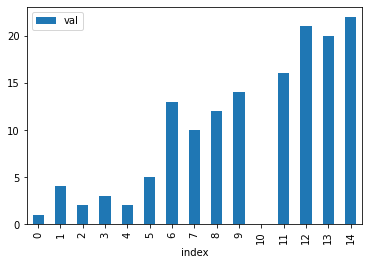

In [12]:
import pandas as pd
data={'val':[1,4,2,3,2,5,13,10,12,14,np.NaN,16,21,20,22]}
df = pd.DataFrame(data).reset_index()
df.plot(kind='bar',x='index',y='val')

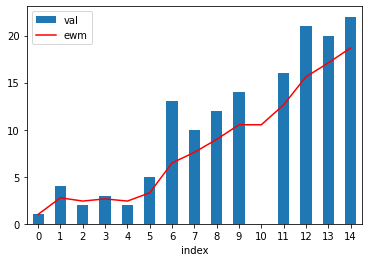

In [13]:
import matplotlib.pyplot as plt
df2 = df.assign(ewm=df['val'].ewm(alpha=0.3).mean())
# val열에 ewm 적용 후 df에 추가

ax = df.plot(kind='bar',x='index',y='val' )
ax2 = df2.plot(kind='line',x='index',y='ewm',c='r',ax=ax)
plt.show()

In [14]:
# 평활화 기법의 하드코딩
import pandas as pd
import numpy as np
df =pd.DataFrame({
    'week':pd.date_range(start='2020-08',periods=8,freq='W'),
    'sales':[39,44,40,45,38,43,39,np.nan],
    '3EMA':[0]*8
})

def myEWMA(data,span):
    
    ewma = [0]*len(data)
    # 지수 이동 평균의 분자
    
    molecule=0
    # 지수 이동 평균의 분모

    denominator = 0
    #값에 곱해지는 가중치
    
    alpha =2.0/(1+span)
    for i in range(len(data)):
        #분자 계산: data+(1+alpha)앞의 데이터
        molecule=data[i]+(1-alpha)*molecule
        # 분모 계산: (1+alpha)의 i승
        denominator += (1-alpha)**i
        print('index')
        print('molecule',molecule)
        print('denominator',denominator)
        
        #지수 이동 평균 계산
        ewma[i] = molecule/denominator
        print('ewma',ewma[i])
        print('='*100)
        return ewma
myEWMA(df['sales'],span=3)


index
molecule 39.0
denominator 1.0
ewma 39.0


[39.0, 0, 0, 0, 0, 0, 0, 0]

Text(0.5, 1.0, 'Close Price for Apple')

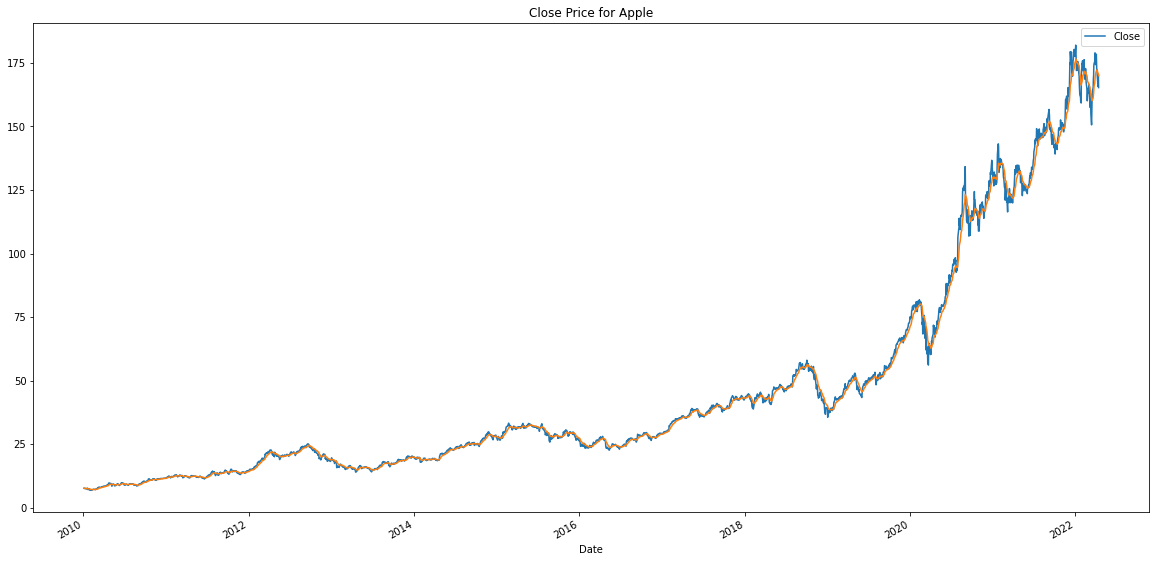

In [15]:
import FinanceDataReader as fdr

df_apple = fdr.DataReader('AAPL',start='2010')
df_apple.tail(10)

df_apple[['Close']].plot(figsize=(20,10))
df_apple['Close_7Days_EMA'] = df_apple['Close'].ewm(7).mean()
df_apple['Close_7Days_EMA'].plot()
plt.title('Close Price for Apple')

In [16]:
# pd.date_range(start='2020-08',periods=8,freq='W')

# df = pd.DataFrame({
#     'week':pd.date_range(start='2020-08',periods=8,freq='W'),
#     'sales':[39,44,40,45,38,43,39,np.nan]
# })
# df['3EMA'] = df[['sales']].ewm(3,alpha=).mean()
# df

# df.sales.plot()
# df['3EMA'].plot(c='r')
# df['3MA'].plot()
# plt.show()

Date
2020-01-02     3750.000000
2020-01-03     3764.285714
2020-01-06     3794.864865
2020-01-07     3833.314286
2020-01-08     3810.921895
                  ...     
2022-04-12    27110.437348
2022-04-13    27020.328011
2022-04-14    27015.246008
2022-04-15    26936.434506
2022-04-18    26802.325880
Name: 7Days_Exponential_mean, Length: 567, dtype: float64
Date
2020-01-02             NaN
2020-01-03             NaN
2020-01-06             NaN
2020-01-07             NaN
2020-01-08             NaN
                  ...     
2022-04-12    27085.714286
2022-04-13    26828.571429
2022-04-14    26614.285714
2022-04-15    26478.571429
2022-04-18    26564.285714
Name: Close_7Days_mean, Length: 567, dtype: float64


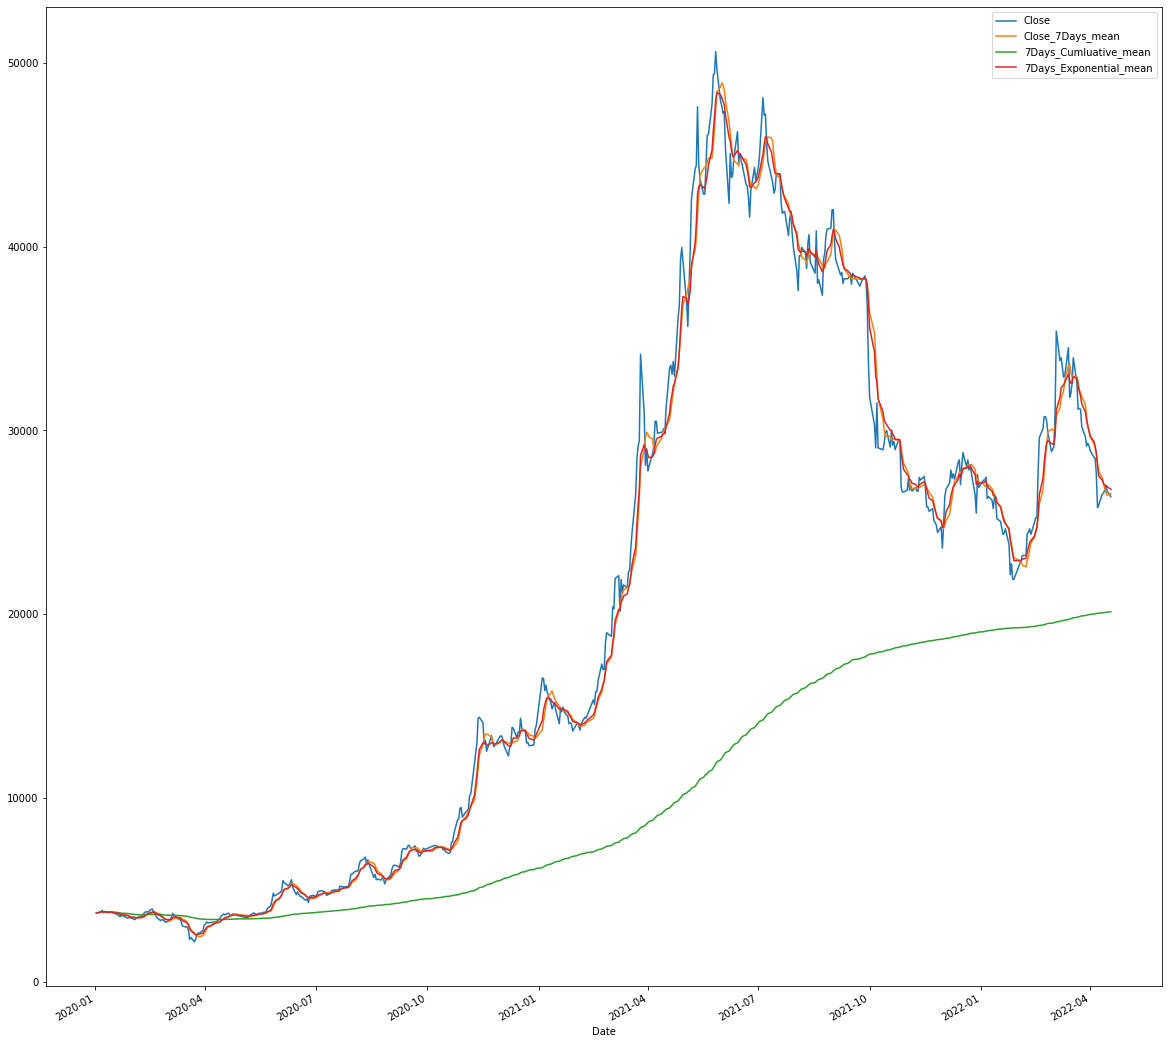

In [17]:
df_hmm = fdr.DataReader('011200',start='2020')
df_hmm_month = df_hmm.resample('M').mean()



hmm = pd.DataFrame({
    'Close':df_hmm['Close'],
    'Close_7Days_mean':df_hmm['Close'].rolling(7).mean(),
    '7Days_Cumluative_mean':df_hmm['Close'].expanding(7).mean(),
    '7Days_Exponential_mean':df_hmm['Close'].ewm(span=7).mean()})
hmm.plot(figsize=(20,20)) # 7일 이평
# hmm['7Days_Cumluative_mean'].plot()        #7일 누적이평 
plt.legend()
print(hmm['7Days_Exponential_mean'])
print(hmm['Close_7Days_mean'])

AR 자기 회귀 모형 
MA 이동 평균 모형
ARMA 자기 자신과 이동평균을 이용한
ARIMA 자기자신과 이동평균의 차분을 이용한
SARIMA 자기 자신과 이동평균의 차분에 대한 계절 성 고려
->가정: 데이터는 정상성을 가져야한다.
만일 데이터가 비정상 계열이면 정상계열 전환 후
모델에 적용한다.

자기상관함수(ACF,AutoCorrelation Function)
다른 시점의 관측값 간의 상호 연관성을 나타내기 위해서 일정 시점 뒤의 값과의 상관관계를 의미한다.
시차가 길수록 상관관계가 0에 수렴하는 성격을 갖는다.
자기상관성이 0에 가는 시간이 느릴수록 비정상 계열의 정보라고 생각한다.
자기상관성이 큰 경우(비정상계열 정보) 두 값의 차이를 의미하는 차분값은 정상 계열의 정보라고 한다.
정상성을 갖는 데이터의 특징
계절성, 추세성, 순환성이 없는 데이터



편자기 함수: 서로 다른 두 시계열 데이터 간의 상호 연관성을 의미한다.


정상 시계열 전환
1. 변동폭이 일반적이지 않으면 로그 전환을 통해서 

In [18]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
# fig = plot_acf(df_vst)

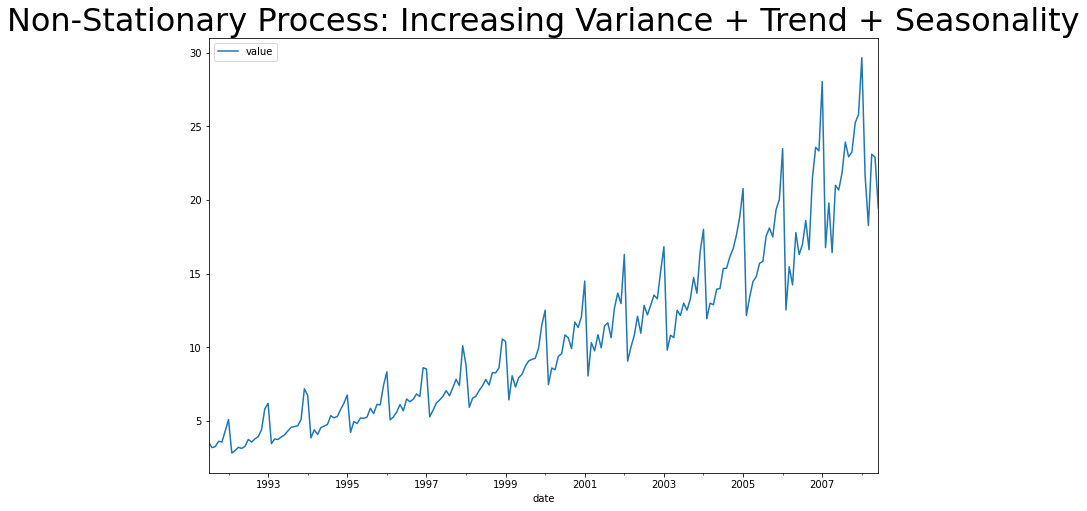

                value
date                 
1991-07-01   3.526591
1991-08-01   3.180891
1991-09-01   3.252221
1991-10-01   3.611003
1991-11-01   3.565869
...               ...
2008-02-01  21.654285
2008-03-01  18.264945
2008-04-01  23.107677
2008-05-01  22.912510
2008-06-01  19.431740

[204 rows x 1 columns]


C:\Users\LG\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


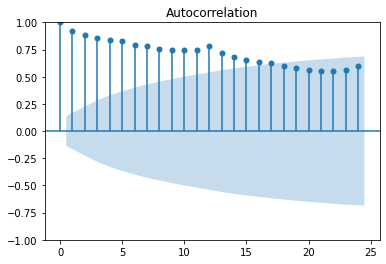

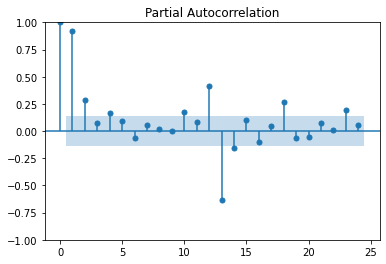

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
file_path ='https://raw.githubusercontent.com/selva86/datasets/master/a10.csv'
df = pd.read_csv(file_path,parse_dates=['date'],index_col='date')
df.head(12)


df.plot(figsize=[12,8])
plt.title('Non-Stationary Process: Increasing Variance + Trend + Seasonality',fontsize=32
    )
plt.show()
fig = plot_acf(df)
fig = plot_pacf(df)
print(df)

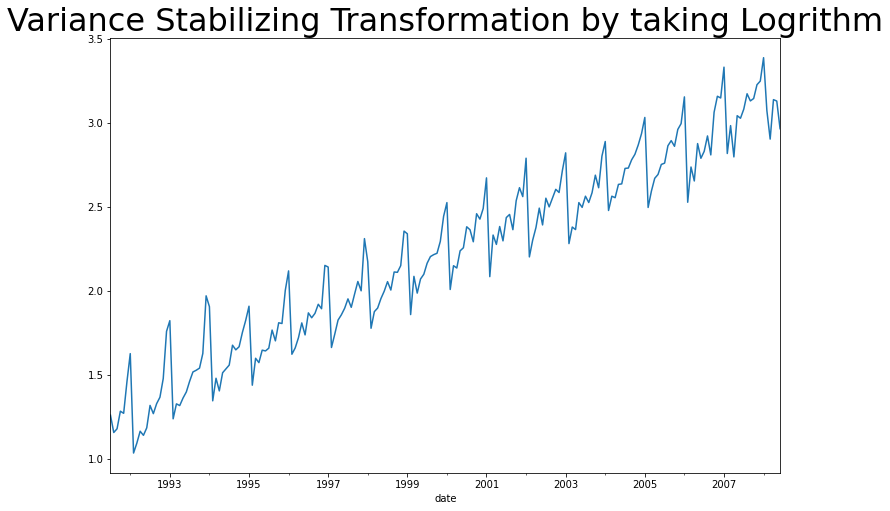

date
1991-07-01    1.260332
1991-08-01    1.157161
1991-09-01    1.179338
1991-10-01    1.283986
1991-11-01    1.271408
                ...   
2008-02-01    3.075203
2008-03-01    2.904984
2008-04-01    3.140165
2008-05-01    3.131683
2008-06-01    2.966908
Name: value, Length: 204, dtype: float64


C:\Users\LG\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


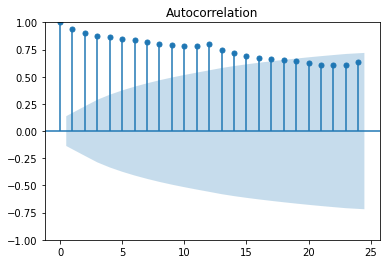

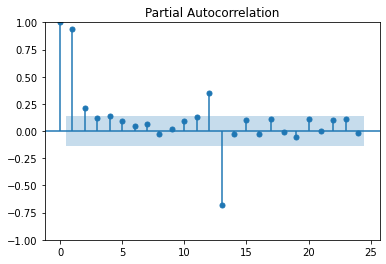

In [20]:
df_vst = np.log(df.value)
df_vst.head()

df_vst.plot(figsize=[12,8])
plt.title('Variance Stabilizing Transformation by taking Logrithm', fontsize=32)
plt.show()
print(df_vst)
fig = plot_acf(df_vst)
fig = plot_pacf(df_vst)

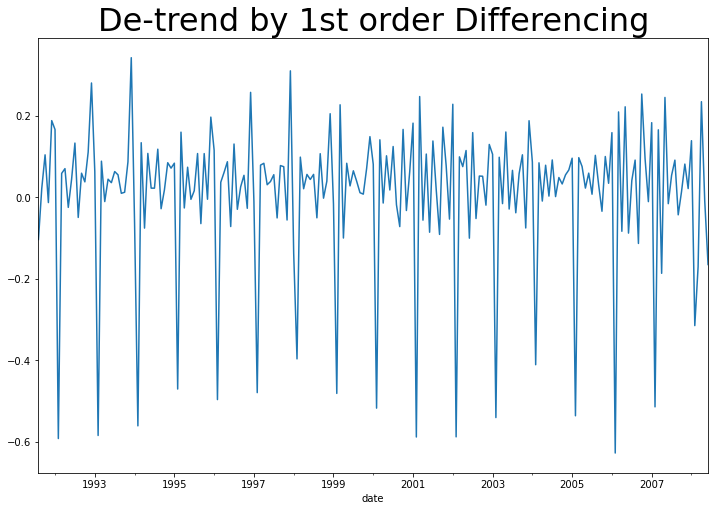

date
1991-08-01   -0.103170
1991-09-01    0.022177
1991-10-01    0.104647
1991-11-01   -0.012578
1991-12-01    0.188688
                ...   
2008-02-01   -0.314777
2008-03-01   -0.170220
2008-04-01    0.235181
2008-05-01   -0.008482
2008-06-01   -0.164775
Name: value, Length: 203, dtype: float64


C:\Users\LG\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


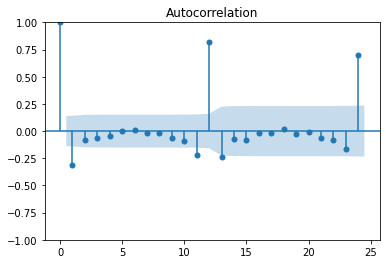

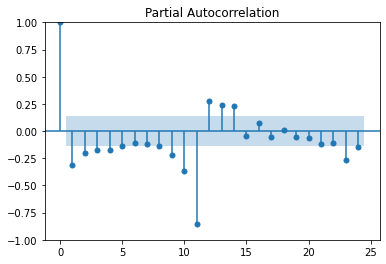

In [21]:
df_vst_diff1 = df_vst.diff(1).dropna()
#바로 직전 데이터와의 차분
df_vst_diff1
plt.figure(figsize=(12,8))
df_vst_diff1.plot()
plt.title('De-trend by 1st order Differencing',fontsize=32)
plt.show()
fig = plot_acf(df_vst_diff1)
fig = plot_pacf(df_vst_diff1)
print(df_vst_diff1)

date
1992-08-01    0.054076
1992-09-01    0.037390
1992-10-01   -0.066394
1992-11-01    0.123880
1992-12-01    0.092449
                ...   
2008-02-01    0.199572
2008-03-01   -0.336310
2008-04-01    0.421552
2008-05-01   -0.254095
2008-06-01   -0.149433
Name: value, Length: 191, dtype: float64


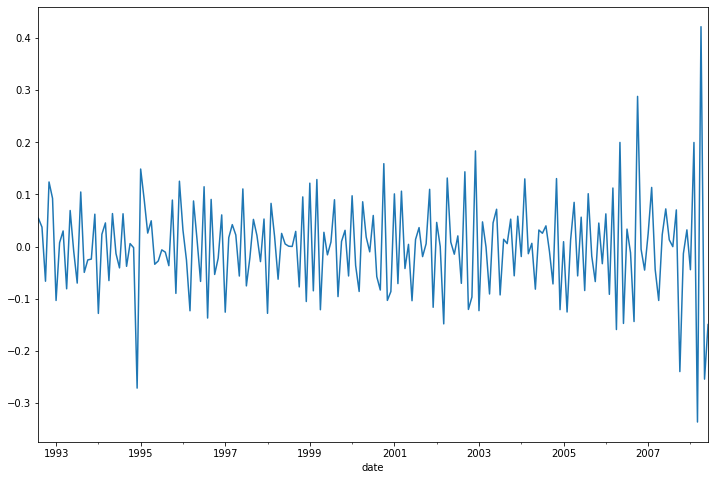

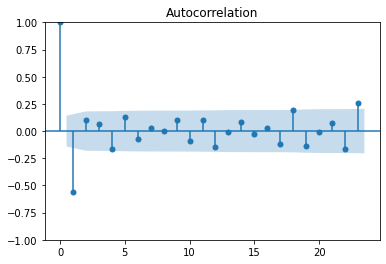

In [22]:
df_vst_diff2 = df_vst_diff1.diff(12).dropna()
#계절성 제거 목적: 지난해 같은 계절의 요인 제거
print(df_vst_diff2)
plt.figure(figsize=(12,8))
df_vst_diff2.plot()
fig = plot_acf(df_vst_diff2)

ArmaProcess
AR: [1.0]
MA: [1.0]
[-2.04707659e-01  4.78943338e-01 -5.19438715e-01 -5.55730304e-01
  1.96578057e+00  1.39340583e+00  9.29078767e-02  2.81746153e-01
  7.69022568e-01  1.24643474e+00  1.00718936e+00 -1.29622111e+00
  2.74991633e-01  2.28912879e-01  1.35291684e+00  8.86429341e-01
 -2.00163731e+00 -3.71842537e-01  1.66902531e+00 -4.38569736e-01
 -5.39741446e-01  4.76985010e-01  3.24894392e+00 -1.02122752e+00
 -5.77087303e-01  1.24121276e-01  3.02613562e-01  5.23772068e-01
  9.40277775e-04  1.34380979e+00 -7.13543985e-01 -8.31153539e-01
 -2.37023165e+00 -1.86076079e+00 -8.60757398e-01  5.60145293e-01
 -1.26593449e+00  1.19827125e-01 -1.06351245e+00  3.32882716e-01
 -2.35941881e+00 -1.99542955e-01 -1.54199553e+00 -9.70735912e-01
 -1.30703025e+00  2.86349747e-01  3.77984111e-01 -7.53886535e-01
  3.31285650e-01  1.34974221e+00  6.98766888e-02  2.46674110e-01
 -1.18616011e-02  1.00481159e+00  1.32719461e+00 -9.19261558e-01
 -1.54910644e+00  2.21845987e-02  7.58363145e-01 -6.605243

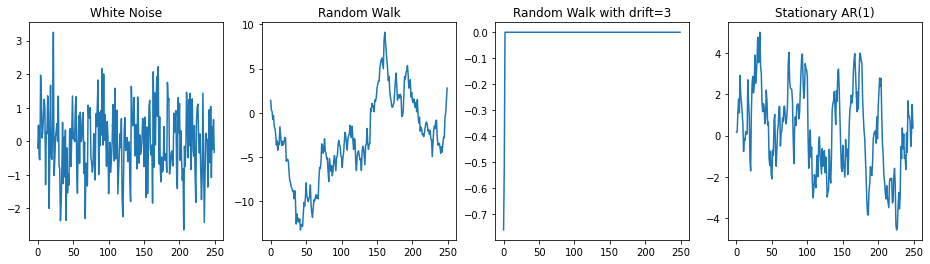

In [23]:
from statsmodels.tsa.arima_process import ArmaProcess
def gen_arma_samples(ar,ma,nobs):
    arma_model = ArmaProcess(ar=ar,ma=ma) 
    #모형 정의
    arma_samples = arma_model.generate_sample(nobs)
    #샘플 생성
    print(arma_model)
    print(arma_samples)
    return arma_samples

def gen_random_walk_w_drift(nobs,drift):
    int = np.random.normal(size=1,loc=0)
    e = np.random.normal(size=nobs, scale=1)
    y = np.zeros(nobs)
    y[0] = int
    for t in (1,nobs):
        y[t] = drift + 1*y[t-1]+e[t]
        return y

np.random.seed(12345)

white_noise = gen_arma_samples(ar = [1], ma = [1], nobs= 250)
#y_t = epsilon_t
random_walk = gen_arma_samples(ar=[1,-1],ma=[1],nobs=250)
#(1-L)y_t = epsilon_t
random_walk_w_drift = gen_random_walk_w_drift(250,2)
#y_t = 2+y_{t-1}+epsilon_t
stationary_ar_1 = gen_arma_samples(ar=[1,-0.9],ma=[1],nobs=250)
#(1-0.9L)y_t = epsilon_t

fig,ax = plt.subplots(1,4)
ax[0].plot(white_noise)
ax[0].set_title('White Noise')

ax[1].plot(random_walk)
ax[1].set_title('Random Walk')

ax[2].plot(random_walk_w_drift)
ax[2].set_title('Random Walk with drift=3')

ax[3].plot(stationary_ar_1)
ax[3].set_title('Stationary AR(1)')

fig.set_size_inches(16,4)

Date
2022-02-04    23200
2022-02-07    23200
2022-02-08    24400
2022-02-09    24450
2022-02-10    24650
2022-02-11    24350
2022-02-14    25000
2022-02-15    25250
2022-02-16    25250
2022-02-17    27800
2022-02-18    29600
2022-02-21    30100
2022-02-22    30750
2022-02-23    30750
2022-02-24    30550
2022-02-25    29900
2022-02-28    28850
2022-03-02    29100
2022-03-03    31000
2022-03-04    35400
2022-03-07    33800
2022-03-08    33950
2022-03-10    32900
2022-03-11    33000
2022-03-14    34500
2022-03-15    31800
2022-03-16    32000
2022-03-17    32550
2022-03-18    33950
2022-03-21    32600
2022-03-22    31150
2022-03-23    31200
2022-03-24    31150
2022-03-25    30200
2022-03-28    29650
2022-03-29    29150
2022-03-30    29300
2022-03-31    29150
2022-04-01    28900
2022-04-04    28550
2022-04-05    28500
2022-04-06    27650
2022-04-07    25800
2022-04-08    25950
2022-04-11    26550
2022-04-12    26600
2022-04-13    26750
2022-04-14    27000
2022-04-15    26700
2022-04-18    2

C:\Users\LG\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


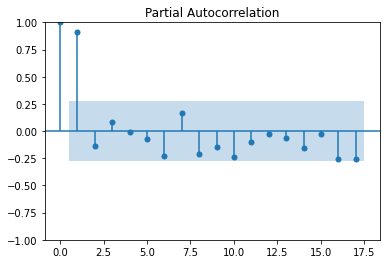

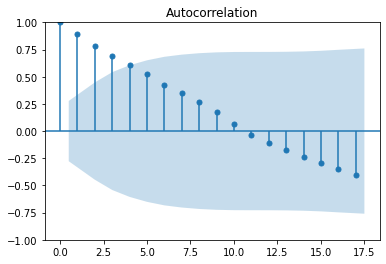

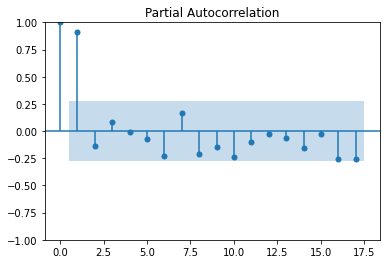

In [87]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA

df_hmm = fdr.DataReader('011200',start='2020')
df_hmm_month = df_hmm.resample('M').mean()

print(df_hmm['Close'].tail(50))

plot_acf(df_hmm['Close'].tail(50))
plot_pacf(df_hmm['Close'].tail(50))



C:\Users\LG\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


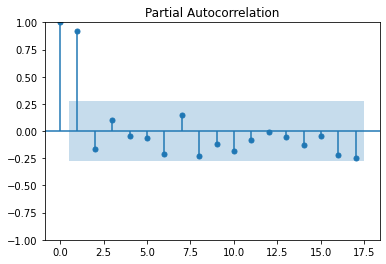

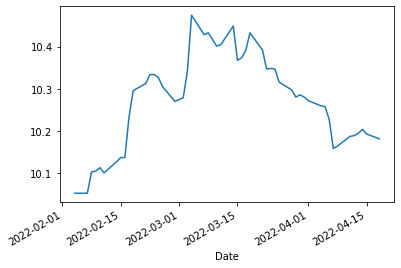

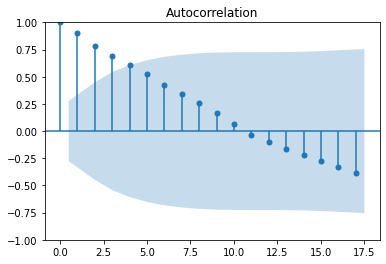

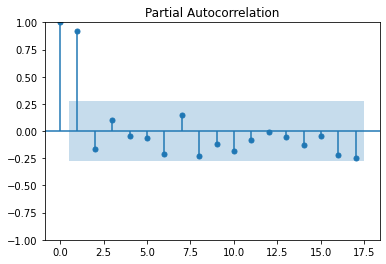

In [48]:
df_vst = np.log(df_hmm['Close'].tail(50))
df_vst.plot()

plot_acf(df_vst)
plot_pacf(df_vst)


C:\Users\LG\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


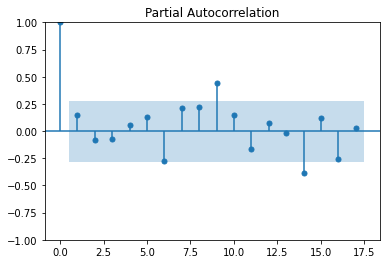

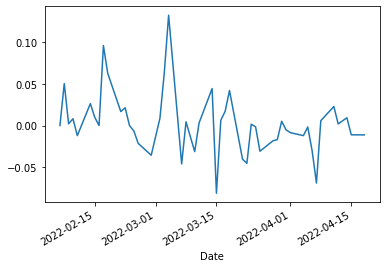

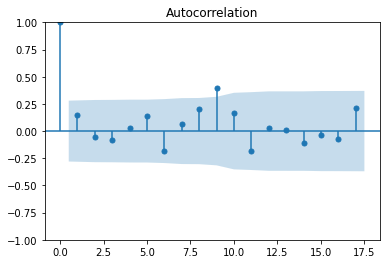

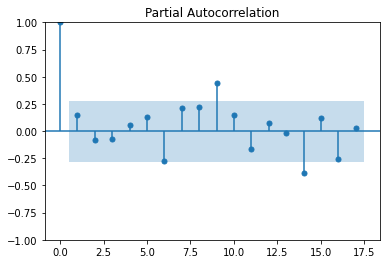

In [49]:
df_vst_diff = df_vst.diff(1).dropna()

df_vst_diff.plot()
plot_acf(df_vst_diff)
plot_pacf(df_vst_diff)

C:\Users\LG\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\LG\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\LG\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\LG\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but i

Date
2022-02-04     0.000000
2022-02-07    10.051908
2022-02-08    10.051908
2022-02-09    10.110658
2022-02-10    10.103350
2022-02-11    10.114048
2022-02-14    10.098015
2022-02-15    10.131355
2022-02-16    10.137444
2022-02-17    10.136439
2022-02-18    10.248699
2022-02-21    10.303261
2022-02-22    10.313769
2022-02-23    10.336927
2022-02-24    10.333104
2022-02-25    10.326132
2022-02-28    10.302226
2022-03-02    10.264523
2022-03-03    10.280800
2022-03-04    10.351804
2022-03-07    10.494718
2022-03-08    10.417237
2022-03-10    10.435188
2022-03-11    10.395621
2022-03-14    10.405690
2022-03-15    10.455818
2022-03-16    10.352595
2022-03-17    10.376941
2022-03-18    10.392777
2022-03-21    10.439226
2022-03-22    10.384282
2022-03-23    10.340343
2022-03-24    10.349466
2022-03-25    10.346091
2022-03-28    10.310563
2022-03-29    10.295014
2022-03-30    10.277766
2022-03-31    10.286594
2022-04-01    10.279156
2022-04-04    10.270349
2022-04-05    10.257607
2022-04-06 

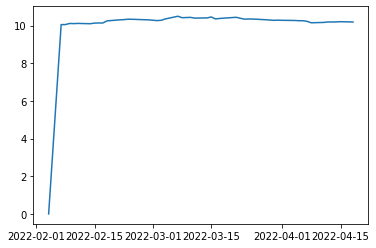

In [89]:
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd


model1 = ARIMA(df_vst, order=(0,1,1))
model2 = ARIMA(df_vst, order=(0,0,1))
model3 = ARIMA(df_vst, order =(1,1,1))

model1_fit = model1.fit()
model2_fit = model2.fit()
model3_fit = model3.fit()

# print(model1_fit.summary())
# print(model2_fit.summary())
# print(model3_fit.summary())
print(model1_fit.predict())
plt.plot(model1_fit.predict())
# plot_predict()